# Compute performance metrics for the given Y and Y_score without sklearn

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

# Confusion Matrix

In [52]:
df = pd.read_csv('5_a.csv')
df['predicted'] = np.where(df['proba'] >= 0.5, 1, 0)
df = df.rename({'y' : 'actual', 'proba' : 'probab'}, axis=1)

conditions = [(df['actual'] == 0) & (df['predicted'] == 0),
              (df['actual'] == 0) & (df['predicted'] == 1),
              (df['actual'] == 1) & (df['predicted'] == 0),
              (df['actual'] == 1) & (df['predicted'] == 1)]

values = ['true_neg', 'false_pos', 'false_neg', 'true_pos']

df['tier'] = np.select(conditions, values)
confusion_matrix = []

def con_mat(df, confusion_matrix):
    for i in values:
        confusion_matrix.append(df[(df['tier'] == i)].shape)

    confusion_matrix = [x[0] for x in confusion_matrix]
    confusion_matrix = np.reshape(confusion_matrix, (2,2))
    return confusion_matrix

confusion_matrix = con_mat(df, confusion_matrix)
print('Confusion Matrix of given dataset is:\n', confusion_matrix)

Confusion Matrix of given dataset is:
 [[    0   100]
 [    0 10000]]


# F1 Score

In [53]:
precision = df[df['tier'] == 'true_pos'].shape[0] / (df[df['tier'] == 'true_pos'].shape[0] + df[df['tier'] == 'false_pos'].shape[0])  
recall = df[df['tier'] == 'true_pos'].shape[0] / (df[df['tier'] == 'true_pos'].shape[0] + df[df['tier'] == 'false_neg'].shape[0])

def F1(precision, recall):
    F1_score = 2 * precision * recall/(precision + recall)
    return F1_score

print('F1 Score of given dataset is: ', F1(precision, recall))

F1 Score of given dataset is:  0.9950248756218906


# Accuracy

In [54]:
def acc(df):
    accuracy = (df[df['tier'] == 'true_pos'].shape[0] + df[df['tier'] == 'true_neg'].shape[0]) / df['tier'].shape[0]
    return accuracy

print('Accuracy of given dataset is: ', acc(df))

Accuracy of given dataset is:  0.9900990099009901


# AUC score 

In [55]:
def roc_curve(y_true, y_prob, thresholds):
    fpr = []
    tpr = []
    A = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        best = 500 * fn + 100 * fp
        A.append([best, threshold])

    return fpr, tpr, A

# You can clearly see that this code doesn't match the way I've calculated my tpr, fpr etc., my method was taking exorbitant amount of time to compute, so I had to look for external help
# Source: https://stackoverflow.com/questions/61321778/how-to-calculate-tpr-and-fpr-in-python-without-using-sklearn

The AUC score for given dataset is:  0.48829900000000004


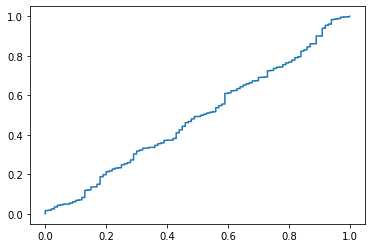

In [56]:
df = df.sort_values(by=['probab'], ascending=False)
fpr, tpr, A = roc_curve(df['actual'], df['probab'], [x for x in df['probab']])

print('The AUC score for given dataset is: ', np.trapz(tpr, fpr))

plt.plot(fpr, tpr)
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

# Confusion Matrix

In [57]:
df = pd.read_csv('5_b.csv')
df['predicted'] = np.where(df['proba'] >= 0.5, 1, 0)
df = df.rename({'y' : 'actual', 'proba' : 'probab'}, axis=1)

conditions = [(df['actual'] == 0) & (df['predicted'] == 0),
              (df['actual'] == 0) & (df['predicted'] == 1),
              (df['actual'] == 1) & (df['predicted'] == 0),
              (df['actual'] == 1) & (df['predicted'] == 1)]

values = ['true_neg', 'false_pos', 'false_neg', 'true_pos']

df['tier'] = np.select(conditions, values)
confusion_matrix = []

def con_mat(df, confusion_matrix):
    for i in values:
        confusion_matrix.append(df[(df['tier'] == i)].shape)

    confusion_matrix = [x[0] for x in confusion_matrix]
    confusion_matrix = np.reshape(confusion_matrix, (2,2))
    return confusion_matrix

confusion_matrix = con_mat(df, confusion_matrix)
print('Confusion Matrix of given dataset is:\n', confusion_matrix)

Confusion Matrix of given dataset is:
 [[9761  239]
 [  45   55]]


# F1 Score

In [58]:
precision = df[df['tier'] == 'true_pos'].shape[0] / (df[df['tier'] == 'true_pos'].shape[0] + df[df['tier'] == 'false_pos'].shape[0])  
recall = df[df['tier'] == 'true_pos'].shape[0] / (df[df['tier'] == 'true_pos'].shape[0] + df[df['tier'] == 'false_neg'].shape[0])

def F1(precision, recall):
    F1_score = 2 * precision * recall/(precision + recall)
    return F1_score

print('F1 Score of given dataset is: ', F1(precision, recall))

F1 Score of given dataset is:  0.2791878172588833


# Accuracy

In [59]:
def acc(df):
    accuracy = (df[df['tier'] == 'true_pos'].shape[0] + df[df['tier'] == 'true_neg'].shape[0]) / df['tier'].shape[0]
    return accuracy

print('Accuracy of given dataset is: ', acc(df))

Accuracy of given dataset is:  0.9718811881188119


# AUC Score

The AUC score for given dataset is:  0.9377570000000001


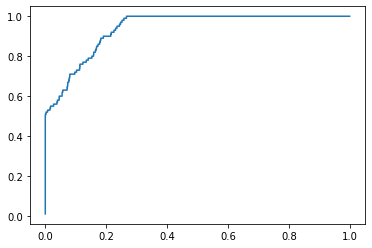

In [60]:
df = df.sort_values(by=['probab'], ascending=False)
fpr, tpr, A = roc_curve(df['actual'], df['probab'], [x for x in df['probab']])
print('The AUC score for given dataset is: ', np.trapz(tpr, fpr))

plt.plot(fpr, tpr)
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [61]:
df = pd.read_csv('5_c.csv')
df = df.sort_values(by=['prob'], ascending=False)

In [62]:
fpr, tpr, A = roc_curve(df['y'], df['prob'], [x for x in df['prob']])
A.sort(key = lambda x: x[0])
print('The best threshold for the min value of A is: ', A[0][1])

The best threshold for the min value of A is:  0.2300390278970873


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [63]:
df = pd.read_csv('5_d.csv')

# Mean squared error

In [64]:
def ss_residue():
    errors = []
    for i in range(0, df.shape[0]):
        error = (df['y'][i] - df['pred'][i])**2
        errors.append(error)
    ss_residue = sum(errors)
    
    return ss_residue

mean_squared_error = 1/df.shape[0] * ss_residue()
print('The Mean squared error for the given dataset is: ', mean_squared_error)

The Mean squared error for the given dataset is:  177.16569974554707


# MAPE

In [65]:
def MAPE(Y_actual,Y_Predicted):
    if Y_actual.all():
        error=0
        for i in range(0, len(Y_actual)):
            error = error + np.abs((Y_actual[i] - Y_Predicted[i]) / Y_actual[i])*100
        return error/len(Y_actual)
    else:
        average_actual = sum(Y_actual) / len(Y_actual)
        error=0
        for i in range(0, len(Y_actual)):
            error = error + np.mean(np.abs((Y_actual[i] - Y_Predicted[i])))
        return error/((average_actual)*len(Y_actual))
        

print('MAPE for the given dataset is: ', MAPE(df['y'], df['pred']))


MAPE for the given dataset is:  0.1291202994009687


# R^2 error

In [66]:
def ss_total():
    errors = []
    mean = np.mean(df['y'])
    for i in range(0, df.shape[0]):
        error = (df['y'][i] - mean)**2
        errors.append(error)
    ss_total = sum(errors)
    
    return ss_total


ss_residue = ss_residue()
ss_total = ss_total()

r_squared = 1 - ss_residue/ss_total
print('The R_squared value for given dataset is: ', r_squared)

The R_squared value for given dataset is:  0.9563582786990964
